In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/grade/KL_grade1st.csv')
df.info()
df

FileNotFoundError: ignored

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#print(df['grade'].value_counts().sort_index())

print('Grade 0 : {}'.format((df['KL0']==1).sum()))
print('Grade 1 : {}'.format((df['KL1']==1).sum()))
print('Grade 2 : {}'.format((df['KL2']==1).sum()))
print('Grade 3 : {}'.format((df['KL3']==1).sum()))
print('Grade 4 : {}'.format((df['KL4']==1).sum()))

Grade 0 : 2507
Grade 1 : 1578
Grade 2 : 2352
Grade 3 : 1231
Grade 4 : 593


([<matplotlib.axis.XTick at 0x251052c2a58>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

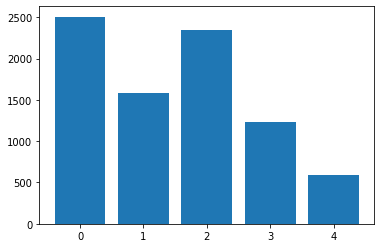

In [ ]:
grade_count = df['KL_Grade'].value_counts().sort_index()
plt.bar(range(len(grade_count)), grade_count.values, align='center')
plt.xticks(range(len(grade_count)), grade_count.index.values)

# grade_counts = pd.DataFrame(grade_count)
# grade_counts
# grade_counts = grade_counts.astype(np.int16)
# grade_counts.columns=['counts']  
# grade_counts

In [ ]:
import os
from glob import glob # 이미지 경로, 확장명만 알려주고 불러오는 함수 

In [ ]:
os.getcwd()  #현재 파일 경로

'C:\\PythonAI_Project\\Workspace'

In [ ]:
image_dir = '../../labelling/'
bbox_dir = '../../labelling/'

In [ ]:
image_files=glob(image_dir + '*.jpg')
len(image_files)

8261

In [ ]:
bbox_files = glob(bbox_dir + "*.xml")
len(bbox_files)

8261

In [ ]:
import cv2   # 영상이나 이미지를 다룰때 필수로 이용하는 라이브러리 openCV
import xml.etree.ElementTree as et   # 파싱하는 용도 xml 파일을 분석하기 위한 라이브러리
from matplotlib.patches import Rectangle # 박스 쳐주는 도구

In [ ]:
# 임의의 파일 설정
test = 40

../../labelling\00000041_0.xml


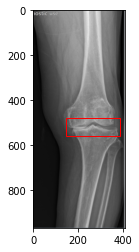

In [ ]:
image_path = image_files[test]  #test 파일 임의 설정
bbox_path = bbox_files[test]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(bbox_path)
tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
''' KFold 속성  // data를 분류해주는 작업 // 숫자를 적어주지 않으면 매번 분류가 달라지기 때문에 숫자를 고정해줘야 매번 같은 data로 분류됨
 n_split : 몇개로 분할할지  // 보통 3, 5, 10 을 사용한다.
 shuffle : Fold를 나누기 전에 무작위로 섞을지
 random_state : 나눈 Fold를 그대로 사용할지
'''
#kf = KFold(n_splits=5, shuffle=True, random_state=42) kf = KFold(n_splits=5, shuffle=True, random_state=42)  
# df['fold'] = -1  #초기화
# ''' 저 t,v 가 train / validation 의 약자 인가요? for문 해석좀 해주세요. '''
# for idx, (t,v) in enumerate(kf.split(df),1):            
#     print(t,v, len(v))
#     df.loc[v,'fold'] = idx

pass

In [ ]:
# print(len(df[df['fold']==1]))  # 하나의 분류에 몇개가 들어가있는가
# print(len(df[df['fold']!=1]))

In [ ]:
# grade_counts=df[df['fold'] == 1]['grade'].value_counts().sort_index()
# grade_counts
# plt.bar(range(len(grade_counts)), grade_counts.values, align='center')
# plt.xticks(range(len(grade_counts)),grade_counts.index.values)

# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# n_split : 몇개로 분할할지
# shuffle : Fold를 나누기 전에 무작위로 섞을지
# random_state : 나눈 Fold를 그대로 사용할지
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['KL_Grade']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx 

[   0    2    3 ... 8258 8259 8260] [   1    6   19 ... 8240 8246 8248] 1653
[   0    1    2 ... 8255 8257 8260] [  11   16   23 ... 8256 8258 8259] 1652
[   0    1    2 ... 8258 8259 8260] [   3   13   14 ... 8247 8249 8250] 1652
[   0    1    2 ... 8256 8258 8259] [   5    7   10 ... 8252 8257 8260] 1652
[   1    3    5 ... 8258 8259 8260] [   0    2    4 ... 8245 8254 8255] 1652


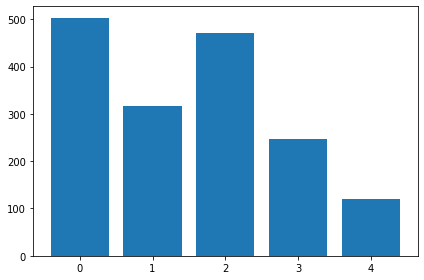

In [ ]:
value_counts = df[df['fold'] ==1]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

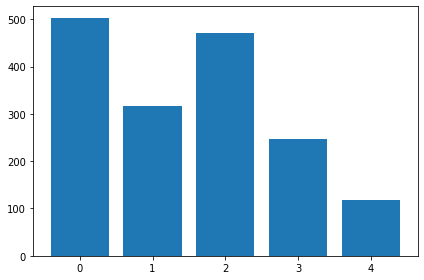

In [ ]:
value_counts = df[df['fold'] ==2]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

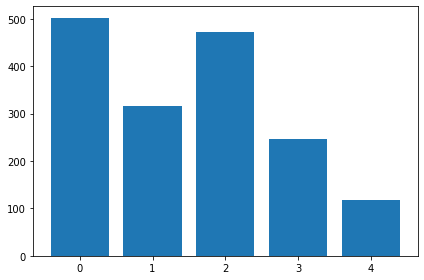

In [ ]:
value_counts = df[df['fold'] ==3]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

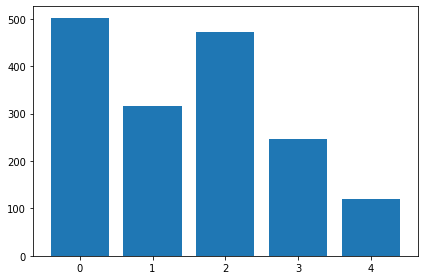

In [ ]:
value_counts = df[df['fold'] ==4]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

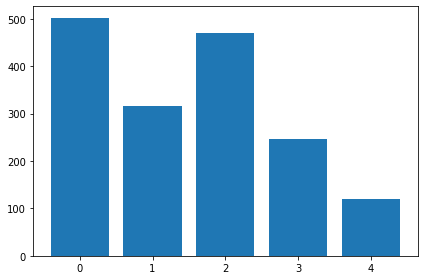

In [ ]:
value_counts = df[df['fold'] ==5]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('./data/grade/KL_grade_kfold_FINAL.csv', index=False) # 저장하기